In [1]:
#!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input,Output
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
from keras.models import load_model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

<ipython-input-1-2c4724a47455>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-2c4724a47455>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
#importing the btc data
import numpy as np
import pandas as pd
df1=pd.read_csv('btcusd.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3158,2023-05-11,27621.085938,27621.941406,26781.826172,27000.789063,27000.789063,16724343943
3159,2023-05-12,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897
3160,2023-05-13,26807.769531,27030.482422,26710.873047,26784.078125,26784.078125,9999171605
3161,2023-05-14,26788.974609,27150.976563,26661.355469,26930.638672,26930.638672,10014858959


In [3]:
df2=pd.read_csv('fed_rate.csv')
df2

,Date,Currently
0,2014-09-17,0.09
1,2014-09-18,0.09
2,2014-09-19,0.09
3,2014-09-20,0.09
4,2014-09-21,0.09
...,...,...
3158,2023-05-11,5.08
3159,2023-05-12,5.08
3160,2023-05-13,5.08
3161,2023-05-14,5.08


In [4]:
# Veri setlerini "Date" sütunu üzerinden birleştir
merged_df = pd.merge(df1, df2, on='Date')

# Birleştirilmiş veri setini kontrol et
print(merged_df.head())

         Date        Open        High         Low       Close   Adj Close   
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015  \
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  Currently  
0  21056800       0.09  
1  34483200       0.09  
2  37919700       0.09  
3  36863600       0.09  
4  26580100       0.09  


In [5]:
merged_df=merged_df.drop(['Date'],axis=1)
# Create standardizer
standardizer = StandardScaler()


In [6]:
# Fit standardizer to dataframe
standardizer.fit(merged_df)
# Apply to data
data_std=standardizer.transform(merged_df)
data_train,data_test = train_test_split(data_std ,test_size=0.3, shuffle=False)
train,test=train_test_split(merged_df,test_size=0.3, shuffle=False)

In [7]:
X_train = []
Y_train = []
for i in range(len(data_train)):
    X_train.append([data_train[i][0],data_train[i][1],data_train[i][2],data_train[i][6]])
    Y_train.append(data_train[i][3])

X_train.remove(X_train[len(X_train)-1])
Y_train.remove(Y_train[0])


X_train =np.array(X_train) # Open,Low,High,Volume
Y_train=np.array(Y_train) # Close

X_train[len(X_train)-1]

X_test = []
Y_test = []
for i in range(len(data_test)):
    X_test.append([data_test[i][0],data_test[i][1],data_test[i][2],data_test[i][6]])
    Y_test.append(data_test[i][3])

X_test.remove(X_test[len(X_test)-1])
Y_test.remove(Y_test[0])

X_test =np.array(X_test) 
Y_test=np.array(Y_test)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
#Linear Regression Prediction
predicted_LR = regressor.predict(X_test)

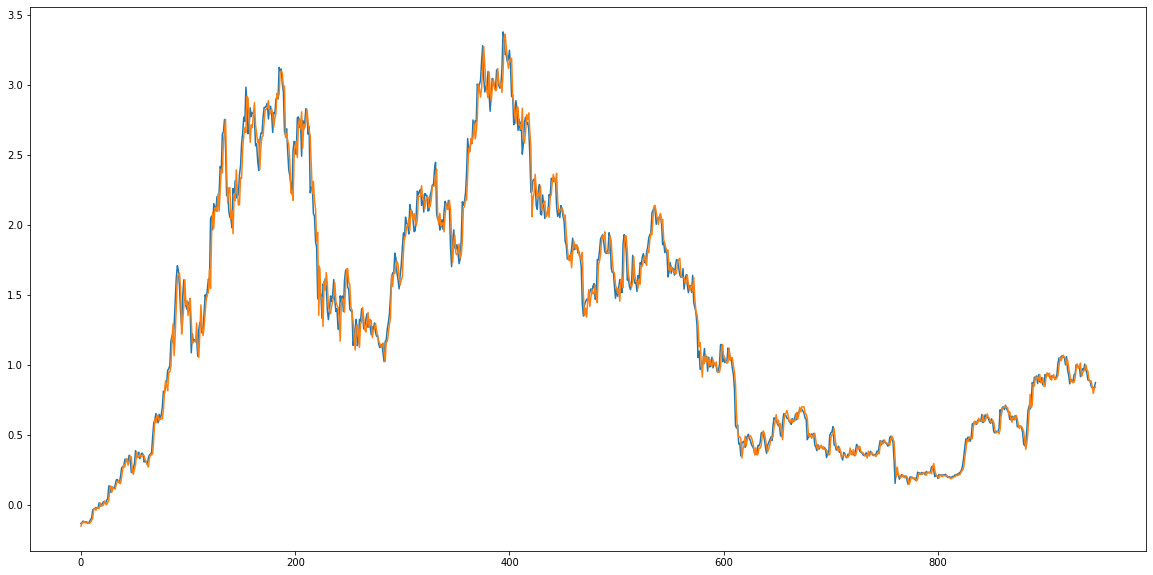

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Gerçek değerlerin grafiği
plt.plot(Y_test, label='Gerçek Değerler')

# Linear Regression tahminlerinin grafiği
plt.plot(predicted_LR, label='Linear Regression Tahminleri')

In [10]:


# SVR modelini oluşturma ve tahmin yapma
model_SVR = SVR(kernel="rbf", C=900, gamma=0.0008)
model_SVR.fit(X_train, Y_train)
predicted_SVR = model_SVR.predict(X_test)

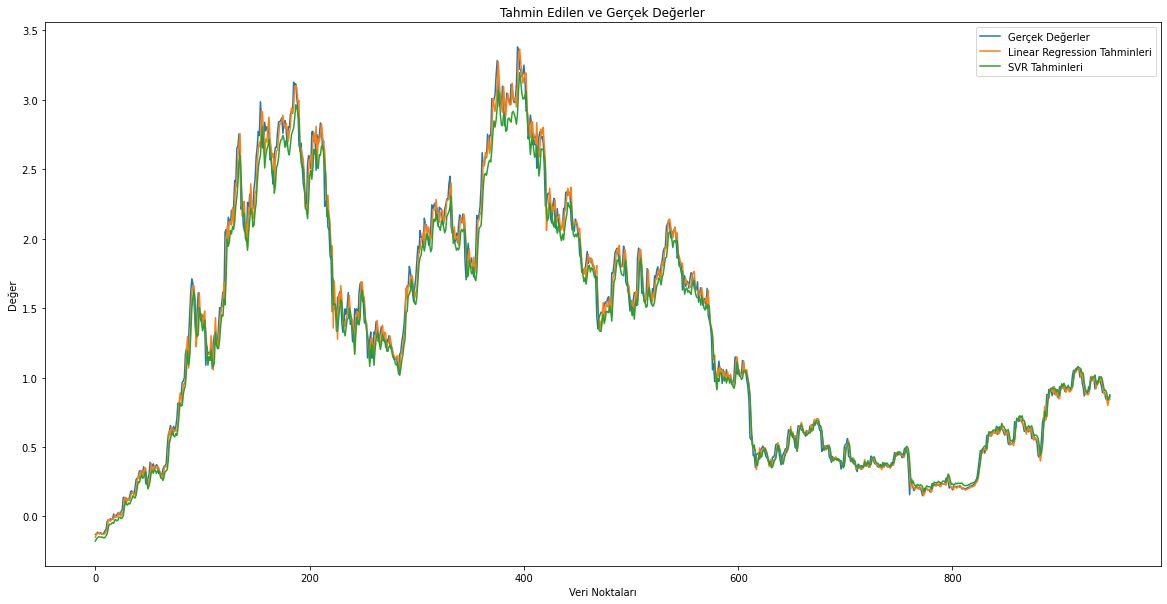

In [11]:
plt.figure(figsize=(20,10))
# Gerçek değerlerin grafiği
plt.plot(Y_test, label='Gerçek Değerler')

# Linear Regression tahminlerinin grafiği
plt.plot(predicted_LR, label='Linear Regression Tahminleri')

# SVR tahminlerinin grafiği
plt.plot(predicted_SVR, label='SVR Tahminleri')

plt.title('Tahmin Edilen ve Gerçek Değerler')
plt.xlabel('Veri Noktaları')
plt.ylabel('Değer')
plt.legend()
plt.show()

In [12]:
from sklearn import metrics
# Lineer Regresyon değerlendirme metrikleri
linear_r2 = metrics.r2_score(Y_test, predicted_LR)
linear_mae = metrics.mean_absolute_error(Y_test, predicted_LR)
linear_mse = metrics.mean_squared_error(Y_test, predicted_LR)
linear_rmse = np.sqrt(linear_mse)

In [13]:
svr_r2 = metrics.r2_score(Y_test, predicted_SVR)
svr_mae = metrics.mean_absolute_error(Y_test, predicted_SVR)
svr_mse = metrics.mean_squared_error(Y_test, predicted_SVR)
svr_rmse = np.sqrt(svr_mse)

In [14]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {
    'MSE': [linear_mse, svr_mse],
    'RMSE': [linear_rmse, svr_rmse],
    'MAE': [linear_mae, svr_mae],
    'R2': [linear_r2, svr_r2]
}

# DataFrame oluştur ve index değerlerini Lineer Regresyon ve SVR olarak ata
error_df = pd.DataFrame(results, index=['Lin R', 'SVR'])

# ERROR'u yazdır
print(error_df)


            MSE      RMSE       MAE        R2
Lin R  0.008873  0.094199  0.062295  0.988528
SVR    0.013577  0.116520  0.082680  0.982448


In [15]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {
    'MSE': [linear_mse, svr_mse],
    'RMSE': [linear_rmse, svr_rmse],
    'MAE': [linear_mae, svr_mae],
    'R2': [linear_r2, svr_r2]
}

# DataFrame oluştur ve index değerlerini kısaltmalar olarak ata
SVR_M_ERROR_df = pd.DataFrame(results, index=['LR', 'SVR'])

# Çıktıyı metin dosyasına aktar
output_text = SVR_M_ERROR_df.to_string()

# Metin dosyasını kaydet
with open('SVR_M_ERROR.txt', 'w') as file:
    file.write(output_text)

In [16]:
import pandas as pd





# Çıktıyı metin dosyasına aktar
output_text = SVR_M_ERROR_df.to_string()

# Metin dosyasını kaydet
with open('SVR_M_ERROR.txt', 'w') as file:
    file.write(output_text)
